In [1]:
import pandas as pd

In [43]:
hotels = pd.read_csv('data\hotels.csv')
print(hotels.info())
hotels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [44]:
hotels['hotel_name'].nunique()

1492

In [47]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
print(hotels['review_date'].min())
print(hotels['review_date'].max())

2015-08-04 00:00:00
2017-08-03 00:00:00


In [55]:
hotels['tags'].iloc[10]

"[' Business trip ', ' Solo traveler ', ' Standard Double or Twin Room ', ' Stayed 1 night ']"

In [76]:
tags = set()
for i in range(0, hotels.shape[0]):
    lst = hotels['tags'].iloc[i]
    lst = lst.replace("[' ", "").replace(" '", "").replace(" ' ", ""). replace("]", "").replace(', ', ',')
    lst = lst.split(',')
    # print(lst)
    for t in lst:
        tags.add(t)
print('Количество тегов: ', len(tags))

Количество тегов:  2368


In [84]:
tags = dict()
for i in range(0, hotels.shape[0]):
    lst = hotels['tags'].iloc[i]
    lst = lst.replace("[' ", "").replace(" '", "").replace(" ' ", ""). replace("]", "").replace(', ', ',')
    lst = lst.split(',')
    # print(lst)
    for t in lst:
        if t not in tags:
            tags[t] = 1
        else:
            tags[t] +=1
tags = sorted(tags.items(), key=lambda kv: kv[1], reverse=True)
print(tags)


[('Leisure trip', 313593), ('Submitted from a mobile device', 230778), ('Couple', 189212), ('Stayed 1 night', 145373), ('Stayed 2 nights', 100263), ('Solo traveler', 81235), ('Stayed 3 nights', 72000), ('Business trip', 61989), ('Group', 49088), ('Family with young children', 45836), ('Stayed 4 nights', 35748), ('Double Room', 26386), ('Standard Double Room', 24151), ('Superior Double Room', 23550), ('Family with older children', 19802), ('Deluxe Double Room', 18623), ('Double or Twin Room', 16824), ('Stayed 5 nights', 15611), ('Standard Double or Twin Room', 13062), ('Classic Double Room', 12716), ('Superior Double or Twin Room', 10238), ('2 rooms', 9287), ('Stayed 6 nights', 7399), ('Standard Twin Room', 7325), ('Single Room', 7227), ('Twin Room', 6279), ('Stayed 7 nights', 5549), ('Executive Double Room', 4763), ('Classic Double or Twin Room', 4576), ('Superior Twin Room', 4540), ('Club Double Room', 4485), ('Deluxe Double or Twin Room', 4465), ('Queen Room', 4071), ('Deluxe King Ro

Первоначальная версия датасета содержит 17 полей со следующей информацией:

hotel_address — адрес отеля;  
review_date — дата, когда рецензент разместил соответствующий отзыв;  
average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;  
hotel_name — название отеля;  
reviewer_nationality — страна рецензента;  
negative_review — отрицательный отзыв, который рецензент дал отелю;  
review_total_negative_word_counts — общее количество слов в отрицательном отзыв;  
positive_review — положительный отзыв, который рецензент дал отелю;  
review_total_positive_word_counts — общее количество слов в положительном отзыве.  
reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;  
total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;  
total_number_of_reviews — общее количество действительных отзывов об отеле;  
tags — теги, которые рецензент дал отелю;  
days_since_review — количество дней между датой проверки и датой очистки;  
additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.  
lat — географическая широта отеля;  
lng — географическая долгота отеля.

In [38]:
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

hotels = hotels.fillna(0)

# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts',
            'total_number_of_reviews_reviewer_has_given', 'additional_number_of_scoring']

# категориальные признаки
hotels['lng'] = hotels['lng'].abs()
cat_cols = ['average_score', 'lat', 'lng']

<AxesSubplot: >

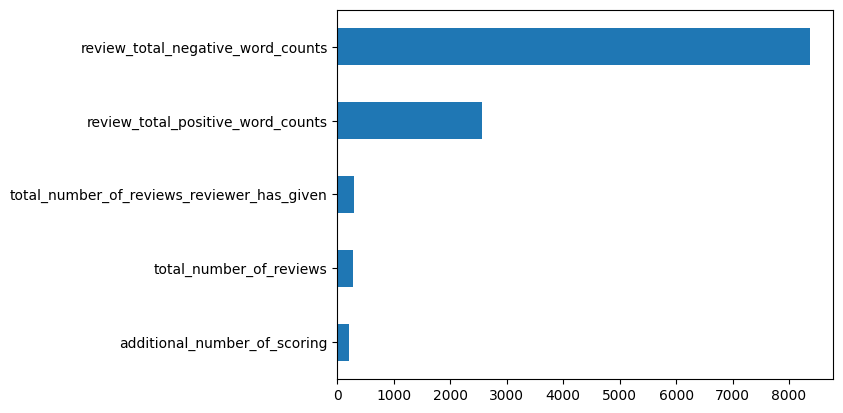

In [42]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [39]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [40]:
X

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng
0,581,8.4,3,1994,4,7,51.507894,0.143671
1,299,8.3,3,1361,2,14,51.521009,0.123097
2,32,8.9,6,406,0,14,48.845377,2.325643
3,34,7.5,0,607,11,8,48.888697,2.394540
4,914,8.5,4,7586,20,10,52.385601,4.847060
...,...,...,...,...,...,...,...,...
386798,107,9.0,0,617,10,10,51.494028,0.191050
386799,272,8.4,0,3224,93,1,48.192379,16.399451
386800,457,6.8,12,2751,9,21,51.520795,0.131084
386801,365,8.1,0,1567,6,28,51.515125,0.160066


<AxesSubplot: >

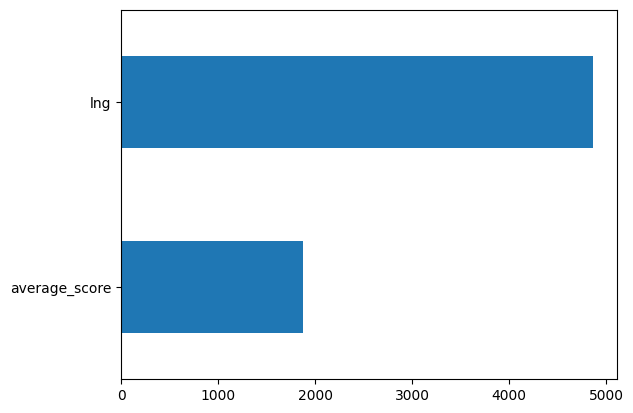

In [41]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [50]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [51]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [53]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1413842177998976


Небольшой бонус:


In [10]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)